# Lab Part 2: Machine Learning - Predictive Modelling

## Purpose

The purpose of this study is to learn methods and tools that can be used to build and fine-tune predictive models based on real-life data. We will focus on the challenging classification tasks due the *high dimenstional* and/or *class-imbalanced* training datasets.   

The task is to build and fine-tune one of the predictive models:

- classifier of email messages into spam or non-spam categories (dataset **spam.dat**),
- classifier of credit card transactions as fraud or non-fraudelent transaction (dataset **creditcard.csv**).

In the former case, the challenge comes from the high dimensionality of the training data, in the latter case, the dataset is highly class-imbalanced with very small number of fraudelent transactions available in the training dataset.


## Datasets

- spam.dat
- creditcard.csv

## Task

We will explain the task using the classification of email / recognition of spam example. The target variable (named target) is set as 'yes' for spam email messages and 'no' otherwise. The binary attributes of email messages used here to train the classifier are based on the SpamAssassin project (http://spamassassin.apache.org).   

The classifer should be fine-tuned to:
* minimize the 'yes' $ \rightarrow $ 'no' error rate (FNR)
* while ensuring that the error rate 'no' $ \rightarrow $ 'yes' (FPR) is below 0.5%

The core of the lab task is learn the ways of fine-tuning the predictive models. Hence the task is to perform a number of experiments (*sensitivity studies*) in order to quantify performance of the classifier(s) as a function of:

**1. The algorithm of the classifier** (use the algorithms such as decision tree, random forest, MLP, SVM, logistic regresssion, kNN, naive Bayes, ...).

**2. Classifer parameters**, primarily focusing on the *capacity* of the model (e.g., complexity of the MLP, the cost parameter C of the SVM model, height of the decision tree, etc.).

**3. Feature selection** / dimensionality reduction of the training data. Learn and try to use the following methods:
- multivariate feature selection methods (e.g., RFE),
- feature selection realized by logisitic regression model selection procedures such as forward, backward etc.
- PCA (classification based on the subset of first principal components).
  
    
**4. Fine-tuning methods dedicated to class-imbalanced problems**  
- balancing the training data (*over / under-sampling*). Note: we balance only the training partition, the testing partition should contain the original proportion of categories,  
- the Smote algorithm.

**5. Using non-symmetric costs of FP and FN errors**: 'no' $ \rightarrow $ 'yes' and 'yes' $ \rightarrow $ 'no' while training the model (e.g., increasing the punishment for the error 'yes' $ \rightarrow $ 'no' should lead to improved sensitivity of spam recognition, at the price of the specificity, and vice-versa).

**6. Ensamble learning** - e.g., the AdaBoost, xgboost algorithm.

**7. Interpretability of the model** - which features are the most important ones? how low/high values of features impact yes/no decisions?  


NOTE: For each of the sensitivity studies you should report the confusion matrix, and sensitivity and specificity of the model, or FNR i FPR rates, and AUC.



<font color=red>
The report should include results of sensitivity studies 1 through 6 for the *selected* dataset / problem. Please upload the report onto Moodle as the Jupyter notebook or a .pdf document and Python source code.
</font>

You may want to choose an alternative dataset/problem for the project -- please select a high-dimensional or class-imbalanced dataset, e.g., from:

https://archive.ics.uci.edu/

https://web.archive.org/web/20240421011255/https://odds.cs.stonybrook.edu/

https://www.kaggle.com/datasets

https://www.kaggle.com/datasets?search=imbalanced&fileType=csv

https://paperswithcode.com

https://paperswithcode.com/datasets?q=anomaly+detection&v=lst&o=match&mod=tabular&page=1

https://github.com/GuansongPang/ADRepository-Anomaly-detection-datasets/tree/main

https://www.unb.ca/cic/datasets/
***

# How to start the project

## Example 1: Spam dataset

## Input data - read-in and analyze
- Read the data into a Pandas dataframe
- Analyze the characteristics / issues in data

Here we realize the *Data understanding* and *Data modification* stages of the CRISP-DM methodology.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
datadir = '/content/drive/MyDrive/Data'
fn = 'spam.dat'

In [ ]:
#dataframe = pd.read_csv("./data/spam.dat")
dataframe = pd.read_csv(os.path.join(datadir, fn))
dataframe.head(5)

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


### Size of the data and descriptive statistics

In [ ]:
dataframe.shape

(4789, 463)

### Are there missing values / outliers in data?

In [ ]:
dataframe.describe()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
count,4789.000000,4789.0,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,0.008144,0.0,0.006056,0.000209,0.006682,0.000626,0.005638,0.007308,0.001879,0.002088,...,0.315097,0.001044,0.000626,0.012946,0.009397,0.000418,0.019420,0.000835,0.001253,0.000626
std,0.089883,0.0,0.077590,0.014450,0.081478,0.025023,0.074882,0.085185,0.043315,0.045653,...,0.464603,0.032298,0.025023,0.113055,0.096489,0.020434,0.138009,0.028892,0.035377,0.025023
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB


### Class-imbalanced data?


In [ ]:
dataframe['target'].value_counts()

,count
target,
no,2949
yes,1840


### Data standardization

Prior to model training, we often standardize the input variables to ensure that the mean  ≈  0, and std  ≈  1.

You may want to use the **StandardScaler** function from the sklearn library.

In this example we follow without standardizing the variables.

***
## Training of a selected model and estimation of predictive performance


### Split data into training and testing partitions

In [ ]:
from sklearn.model_selection import train_test_split

X = dataframe.drop(['target'],axis=1)
y = dataframe.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=331, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 3208, test rows: 1581


## Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9765970904490828

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[922  16]
 [ 21 622]]


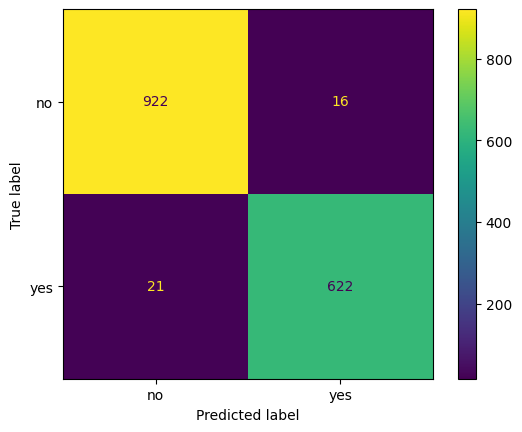

In [ ]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      0.98      0.98       938
         yes       0.97      0.97      0.97       643

    accuracy                           0.98      1581
   macro avg       0.98      0.98      0.98      1581
weighted avg       0.98      0.98      0.98      1581



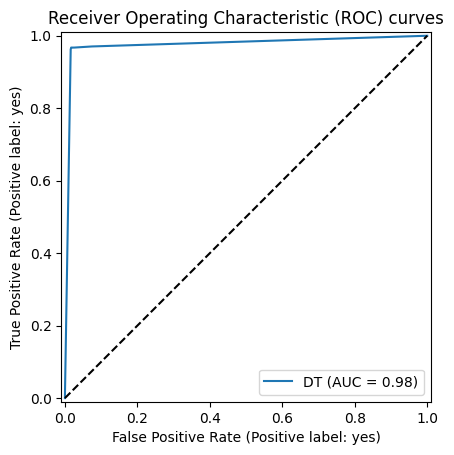

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, y_test, name='DT')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()


### Visualizing the tree

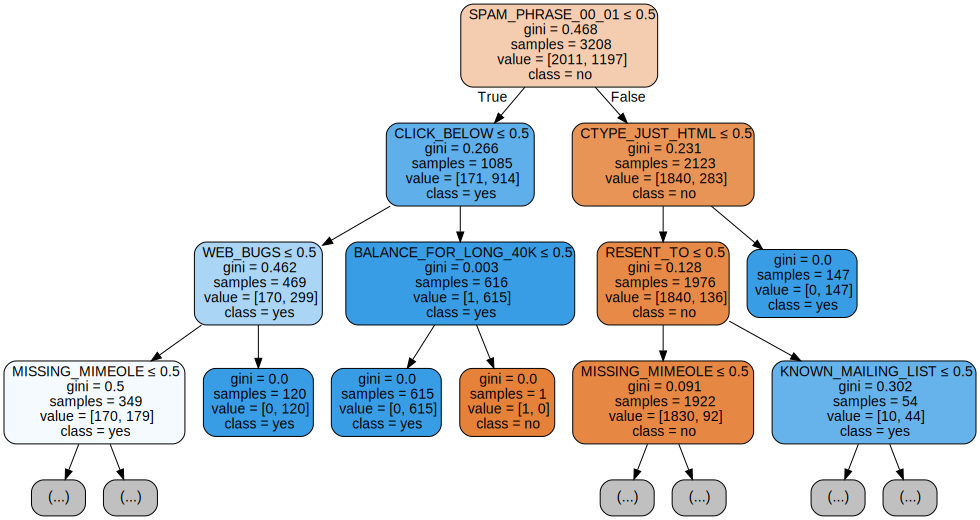

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, max_depth=3,
                                feature_names=X_train.columns, class_names=sorted(y_train.unique()),
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

***
## Example 2: Credit card data

For details on this dataset - please refer to the creditcard-data-readme.txt


In this example we focus on the class-imbalanced problem.

In [ ]:
datadir = '/content/drive/MyDrive/Data'
fn = 'creditcard.csv'
dataframe = pd.read_csv(os.path.join(datadir, fn))
#dataframe = pd.read_csv("./data/creditcard.csv")
dataframe.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataframe.shape

(284807, 31)

### Class-imbalance -- very few *fraud* transactions

In [ ]:
dataframe['Class'].value_counts()

,count
Class,
0,284315
1,492


### Class-imbalanced data leads to low sensitivity

When the *event* we want to train the model to discover (fraud in our example) is rare in the training data, predictive models tend to realize low sensitivity -- we illustrate this using a decision tree model.

In [ ]:
X = dataframe.drop(['Class'],axis=1)
y = dataframe.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=331, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 190820, test rows: 93987


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9992339366082543

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])


array([[  122,    35],
       [   37, 93793]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
(tp, fn, fp, tn)

(122, 35, 37, 93793)

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)

print("sensitivity = {:.4f}, specificity = {:.4f}".format(sensitivity, specificity))

sensitivity = 0.7771, specificity = 0.9996


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.77      0.78      0.77       157

    accuracy                           1.00     93987
   macro avg       0.88      0.89      0.89     93987
weighted avg       1.00      1.00      1.00     93987



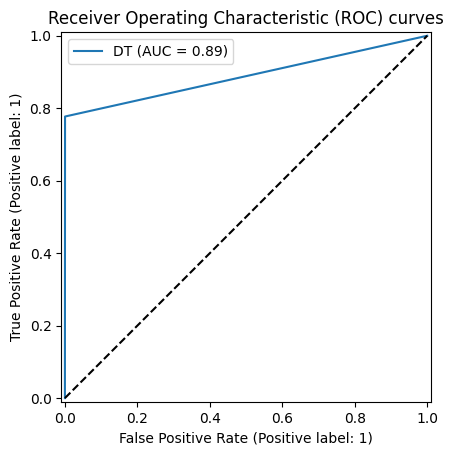

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, y_test, name='DT')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()


### Observation / conclusion:
1. we observe *very high accuracy* of the model
2. but *sensitivity* of the model is *low*

The purpose of the project task is use/combine techniques 1 through 6 to improve the sensitivity of your model(s), but you should at the same time try to minimize the negative impact this will have on the specificity of the model.

***
## Example 3: SMTP attacks dataset

SMTP dataset
http://odds.cs.stonybrook.edu/smtp-kddcup99-dataset/

Smtp (KDDCUP99)
points: 95156
dimenstions: 3
outliers: 30 (0.03%)

The dataset includes aggregates samples from TCP connections; 30 samples (denoted as outliers) represents attacks, remaining samples (inliers) denote the normal traffic.

This is an example of class-imbalanced problem.

***

In [ ]:
!pip install h5py

In [ ]:
import numpy as np
import h5py
datadir = '/content/drive/MyDrive/Data'
fn = 'smtp.mat'
#dataframe = pd.read_csv(os.path.join(datadir, fn))
f = h5py.File(os.path.join(datadir, fn),'r')
print(f.keys())


<KeysViewHDF5 ['X', 'y']>


In [ ]:
X = np.array(f.get('X')).T
y = np.array(f.get('y')).ravel().astype(int)


In [ ]:
# X: observations - features of TCP connections
# y: connections denotes as: normal traffic (inlier), or attack (outlier)
print(X)
print(X.shape)
print(y)
print(y.shape)  # 0 - inlier, 1 - outlier


[[ 0.09531018  7.09597607  5.79636166]
 [ 0.09531018  7.42601321  5.80844275]
 [-2.30258509  6.88663378  5.79939564]
 ...
 [-2.30258509  6.73471056  5.79939564]
 [ 0.09531018  6.91879413  5.80844275]
 [ 0.09531018  6.60272357  5.80242044]]
(95156, 3)
[0 0 0 ... 0 0 0]
(95156,)


In [ ]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)


[[    0 95126]
 [    1    30]]


This dataset is very imbalanced -- is it doable to build a supervised learning - based model to detect this type of attack?

## Tools to learn and use

### Tools from the scikit-learn library

http://scikit-learn.org/stable/index.html

http://scikit-learn.org/stable/user_guide.html


The Anaconda distribution is recommended in this project.


### Classification algorithms (just a few suggestions)

*   from sklearn.tree import DecisionTreeClassifier
*   from sklearn.naive_bayes import MultinomialNB
*   from sklearn import svm
*   from sklearn.neural_network import MLPClassifier


### Methods dedicated to class-imbalanced data

imbalanced-learn Python library:

import imblearn

see also: https://github.com/scikit-learn-contrib/imbalanced-learn

for the **Smote** algorithm


### Dimensionality reduction / PCA

*   from sklearn.decomposition import PCA
*   sklearn.feature_selection


### Measures of predictive performance


*   from sklearn.metrics import confusion_matrix
*   other measure -- e.g. the ROC curve, AUCROC, etc.




### Interpretability of predictive models

*Feature importance* is calculated by some methods (decision trees, random forests, logistic regression, ...)

Alternatively, *SHAP values* allow for interpretability of classifiers decisions. See the **shap** module (import shap).

### Suggested environment for the project

I suggest to use the **jupyter lab** notebooks (or jupyter notebook).

I also suggest to use the **Anaconda distribution** -- see instruction:  
https://docs.anaconda.com/anaconda/install/linux/


Alternatively, you may want to use your notebooks in **Google Colab** -- see instruction:

https://colab.research.google.com/notebooks/intro.ipynb

